In [2]:
import scipy as sp
import matplotlib.pyplot as plt

import librosa
import librosa.display as ld
from IPython.display import Audio

import csv
import itertools
from collections import Counter

In [3]:
# Função que retorna os índices dos n maiores valores de uma lista em ordem decrescente
def maiores_indices(lista, n):
    if n > len(lista):
        raise ValueError("O número de índices solicitados excede o tamanho da lista.")
    
    lista_com_indices = list(enumerate(lista))
    
    lista_ordenada = sorted(lista_com_indices, key=lambda x: x[1], reverse=True)
    
    return [indice for indice, valor in lista_ordenada[:n]]

# Retorna uma lista com as notas e outra lista com as frequências correspondentes  
def carregar_frequencias(arquivo_csv):
    notas = []
    frequencias = []
    
    with open(arquivo_csv, newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        notas = next(reader)
        for linha in reader:
            frequencias.append([float(freq) for freq in linha])
    
    return notas, frequencias

# Lê as notas e frequências
notas, frequencias = carregar_frequencias('Tabelas/frequencias.csv')

# Retorna uma lista com os tipos de acorde e outra lista com as formações correspondentes para cada tom 
def carregar_formacoes(arquivo_csv):
    tipos_de_acorde = []
    formacoes = []
    
    with open(arquivo_csv, newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        tipos_de_acorde = next(reader)
        for linha in reader:
            formacoes.append([freq for freq in linha])
    
    return tipos_de_acorde, formacoes

# Lê os tipos de acorde e as formções
tipos_de_acorde, formacoes = carregar_formacoes("Tabelas/formacoes.csv")

# Retorna o acorde com base na formação passada como parâmetro
def get_chord(formation):
    global tipos_de_acorde
    global formacoes

    for linha in formacoes:
        for i, notes in enumerate(linha):
            if formation == notes:
                if i == 0:
                    return "Nota: " + linha[0]
                elif i == 1:
                    return linha[0]
                else:
                    return linha[0] + tipos_de_acorde[i]
    
    return None

# Retorna a nota cuja frequência mais se aproxima da frequência passada como parâmetro
def nota_mais_proxima(frequencia):
    global notas
    global frequencias
    
    diferenca_minima = float('inf')
    nota_proxima = None
    
    for i, faixa in enumerate(frequencias):
        for j, freq in enumerate(faixa):
            diferenca = abs(frequencia - freq)
            if diferenca < diferenca_minima:
                diferenca_minima = diferenca
                nota_proxima = notas[j]

    return nota_proxima

# Pega uma lista de notas e retorna uma string única em ordem alfabética com as notas sem repetição 
def get_formation(note_list):
    remove_duplicates = set(note_list)
    formation = "".join(sorted(list(remove_duplicates)))
    return (formation, len(remove_duplicates))

# Retorna uma lista de notas a partir de uma lista de frequências
def freqs_to_notes(freq_list):
    notes = []
    for freq in freq_list:
        notes.append(nota_mais_proxima(freq))
    
    return notes

# Gera uma lista com as combinações n a n de uma lista
def gerar_combinacoes(lista, n):
    lista = sorted(lista)

    combinacoes = list(itertools.combinations(lista, n))

    formacoes_possiveis = []
    for tupla in combinacoes:
        formacoes_possiveis.append("".join(tupla))
    
    return formacoes_possiveis

In [4]:
# Ler o arquivo de áudio
data, fs = librosa.load("Notas/C.wav")

Audio(data=data, rate=fs)

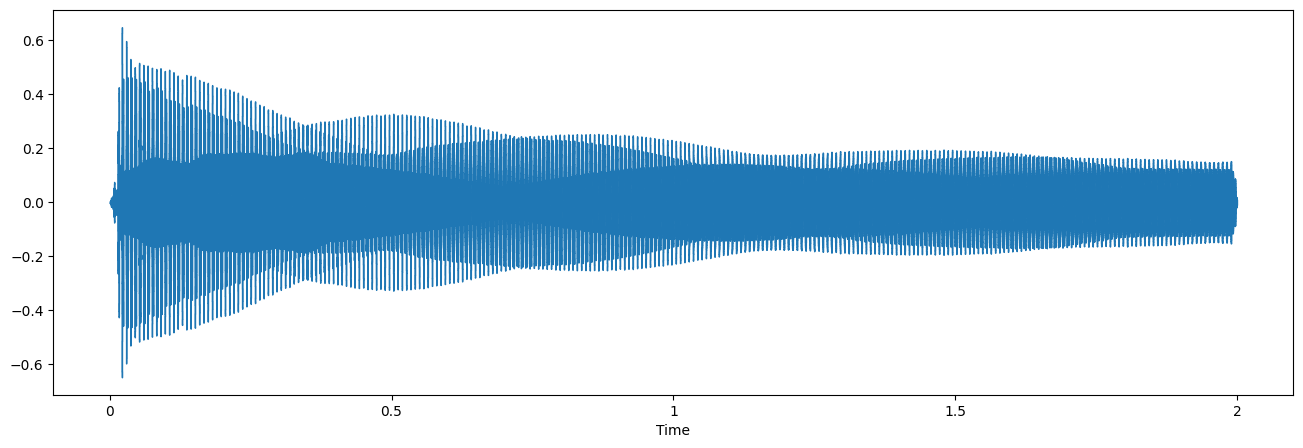

In [5]:
# Plotar o sinal do áudio
plt.figure(figsize=(16, 5))
ld.waveshow(data, sr=fs)

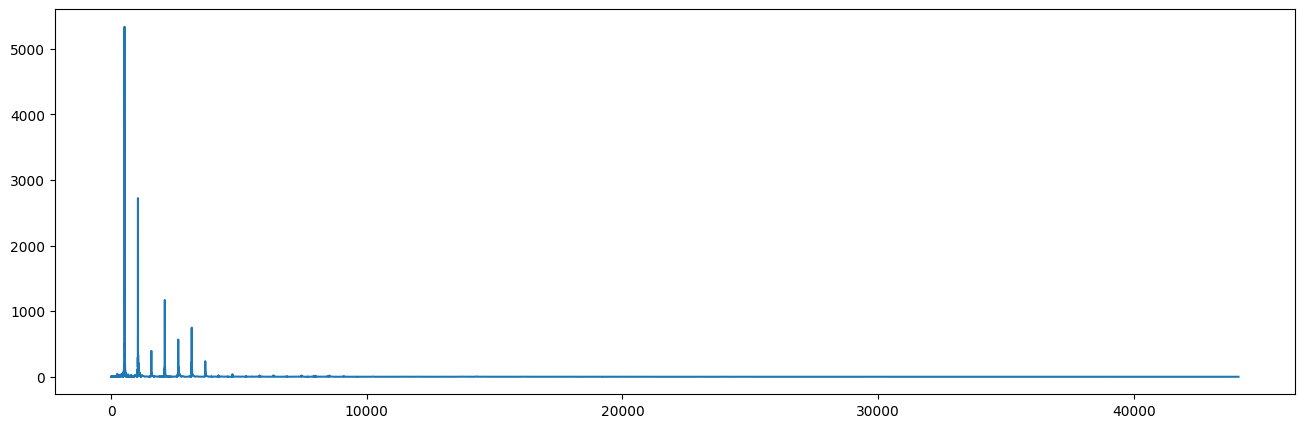

In [9]:
# Fazer a transformada do cosseno discreta do sinal para identificar quais são as frequências mais importantes 
f = abs(sp.fft.dct(data))

# Plotar o gráfica da transformada
plt.figure(figsize=(16, 5))
plt.plot(f)

In [11]:
# Imprimir a lista com as notas mais importantes
print(lista := maiores_indices(f,12))

# Transforma a lista de frequências em uma lista de notas
lista = freqs_to_notes(lista)

# Imprimir a lista de notas
print(lista, end="\n\n")

# Gerar a formação com base na lista de notas e saber quantas notas tem naquela formação
formation, n_notes = get_formation(lista)

# Imprimir as ntoas que foram identificadas na formação
print("Notas identificadas:", formation, end="\n\n")

# Gerar o acorde com base na formação
chord = get_chord(formation)

# Manipulações caso o acorde não seja identificado de primeira
if chord is not None:   # o acorde foi identificado de primeira
    print(chord)
elif n_notes == 3:      # se não foi identificado e possui 3 notas, não se sabe qual é o acorde
    print("Não foi possível identificar um acorde com essa formação")
elif n_notes == 4:      # se não foi identificado, mas possui 4 notas, gerar a combinação 3 a 3 e buscar novamente, pois pode existir um nota "intrusa"
    formacoes_possiveis = gerar_combinacoes(set(lista), 3)

    for formacao in formacoes_possiveis:
        chord = get_chord(formacao)
        if chord != None:
            print(chord)
            break
elif n_notes > 4:       # se não foi identificado e possui mais que 4 notas, gerar as combinações 4 a 4 e 3 a 3 e buscar novamente
    formacoes_possiveis = gerar_combinacoes(set(lista), 4) + gerar_combinacoes(set(lista), 3)

    for formacao in formacoes_possiveis:
        chord = get_chord(formacao)
        if chord != None:
            print(chord)
            break
elif n_notes == 2:      # se não foi identificado e possui apenas 2 notas, retornar a mais recorrente
    print(get_chord(Counter(lista).most_common(1)[0][0]))
else:                   # se não, realmente não é possível identificar nenhum acorde
    print("Não foi possível identificar um acorde com essa formação")

[522, 523, 1047, 521, 524, 1046, 2097, 525, 526, 2098, 519, 520]
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']

Notas identificadas: C

Nota: C
